# Compare the angular power spectra $C_l^{kk}$ for linear and nonlinear $P(k)$

In [63]:
# load saved Fobj
# get lensing and galaxy Fisher matrix to add

import FisherCl as fcl
import noiseCl as ncl
import crosspower as cp
import pickle

filehandler2 = open('Fisher_7_6X4_w2.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#filehandler2 = open('Fisher_7_6X4.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#neutrino_hierarchy = 'normal', usePrimaryCMB = True; from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use modelDNDZ3; set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.005

filehandler1 = open('Fisher_7_6X2_w2.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#filehandler1 = open('Fisher_7_6X2.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'normal', usePrimaryCMB = True; from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use modelDNDZ3; set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.005


Fobj1 = pickle.load(filehandler1) 
Fobj2 = pickle.load(filehandler2) 




In [64]:
# get Cl^kk from each
print Fobj1.crossCls.shape
print Fobj1.crossCls.shape

clkk1 = Fobj1.crossCls[0,0]
clkk2 = Fobj2.crossCls[0,0]
ells1 = Fobj1.ells
ells2 = Fobj2.ells
print ells1

(7, 7, 2999)
(7, 7, 2999)
[2.000e+00 3.000e+00 4.000e+00 ... 2.998e+03 2.999e+03 3.000e+03]


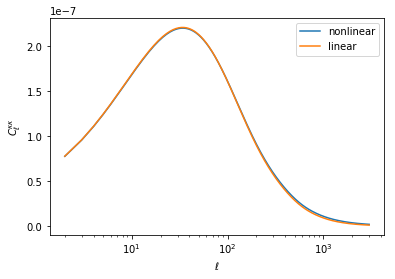

In [65]:
plt.semilogx(ells1,clkk1,label='nonlinear')
plt.semilogx(ells2,clkk2,label='linear')
plt.legend()
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_\ell^{\kappa\kappa}$')
plt.show()

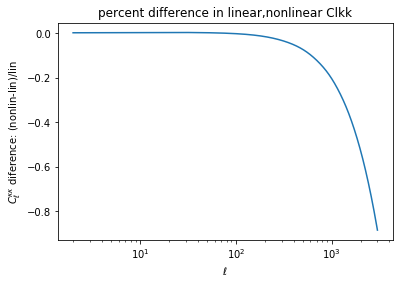

In [66]:
plt.semilogx(ells1,(clkk2-clkk1)/clkk2)
#plt.legend()
plt.title('percent difference in linear,nonlinear Clkk')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_\ell^{\kappa\kappa}$ diference: (nonlin-lin)/lin')
plt.show()

In [67]:
# define ranges for ell, ellP in Fisher matrices
myLmin = 50; myLmax=3000
myLminP = 50; myLmaxP=5000

In [68]:
# make a noise-free kk-only Fisher matrix
def getKK(Fobj,myLmin=50):
    Clkk = Fobj.crossCls[0,0]
    dClkk = Fobj.dClVecs[0]
    print 'Clkk shape: ',Clkk.shape
    print 'dClkk shape: ',dClkk.shape
    ells = Fobj.ells
    nCosParams = Fobj.nCosParams
    lmin = Fobj.lmin
    
    cov_kk = 2*Clkk**2 / (2*ells+1)
    Fij_kk = np.zeros((nCosParams,nCosParams))
    minEllInd = myLmin-lmin  # eg. 50-2
    for pNum1 in range(nCosParams):
        for pNum2 in range(pNum1,nCosParams):
            # the next line does the summation over ell
            Fij_kk[pNum1,pNum2] = np.sum(dClkk[pNum1,minEllInd:]*dClkk[pNum2,minEllInd:]/cov_kk[minEllInd:])
            Fij_kk[pNum2,pNum1] = Fij_kk[pNum1,pNum2]
    print 'parameters: ',Fobj.paramList[:nCosParams]
    print 'kappa-only, noise-free Fisher matrix:'
    print Fij_kk
    return Fij_kk

Fij_kk_lin = getKK(Fobj2)
Fij_kk_nln = getKK(Fobj1)

Clkk shape:  (2999,)
dClkk shape:  (14, 2999)
parameters:  ['ombh2', 'omch2', 'cosmomc_theta', 'As', 'ns', 'tau', 'mnu', 'w']
kappa-only, noise-free Fisher matrix:
[[ 2.32246401e+09 -2.05195779e+09  3.19683355e+10 -4.78877476e+16
  -1.77224493e+08  1.13564820e+05  2.08524969e+07  5.87755517e+06]
 [-2.05195779e+09  1.81310200e+09 -2.82498006e+10  4.23246324e+16
   1.56526654e+08 -1.00388118e+05 -1.84292729e+07 -5.19710748e+06]
 [ 3.19683355e+10 -2.82498006e+10  4.40290404e+11 -6.60188564e+17
  -2.43112250e+09  1.56689974e+06  2.87466197e+08  8.11944761e+07]
 [-4.78877476e+16  4.23246324e+16 -6.60188564e+17  9.92293774e+23
   3.60691471e+15 -2.35958024e+12 -4.32122652e+14 -1.22583986e+14]
 [-1.77224493e+08  1.56526654e+08 -2.43112250e+09  3.60691471e+15
   1.40601530e+07 -8.48969756e+03 -1.56956539e+06 -4.34993285e+05]
 [ 1.13564820e+05 -1.00388118e+05  1.56689974e+06 -2.35958024e+12
  -8.48969756e+03  5.61927826e+00  1.02761575e+03  2.92529191e+02]
 [ 2.08524969e+07 -1.84292729e+07  2.8

# get noise

In [69]:
lmin = Fobj1.lmin
lmax = Fobj1.lmax

In [70]:
# copy some code from FisherCl
z0 = 0.5

print 'creating noise arrays... '

print 'getting (EB) lensing reconstruction noise... '
# noise levels from a possible CMB-S4 design:
nlev_t     = 1.   # temperature noise level, in uK.arcmin.
nlev_p     = 1.414   # polarization noise level, in uK.arcmin.
beam_fwhm  = 1.   # Gaussian beam full-width-at-half-maximum.

#ells,EB_noise = ncl.getRecNoise(self.lmax,nlev_t,nlev_p,beam_fwhm)
ellsQC,EB_noise = ncl.getRecNoise(lmax,nlev_t,nlev_p,beam_fwhm)

# convert Nl^dd to Nl^kk
# use Cl^kk = 1/4*[l*(l+1)]^2 * Cl^phiphi?
# but d is in between k and phi, so...?
# Scratch that.
# Assume output of quicklens is Cl^phiphi
#Nlkk = EB_noise * (ells*(ells+1)/2)**2
Nlkk = EB_noise * (ellsQC*(ellsQC+1)/2)**2


print 'getting galaxy shot noise... '
# From Schaan et. al.: LSST n_source = 26/arcmin^2 for full survey
#nbar = 26 # arcmin^-2
nbar = 66 # 66 arcmin^-2 to match Bye's value

# the selection of beesBins must be consistent with that which is selected in cp.tophat
beesBins = True
if beesBins:
    binEdges = [0.0,0.5,1.0,2.0,3.0,4.0,7.0]
    nBins = 6
else:
    #binEdges = np.linspace(self.zmin,self.zmax,self.nBins+1)
    #nBins = self.nBins
    binEdges = np.linspace(Fobj1.zmin,Fobj1.zmax,Fobj1.nBins+1)
    nBins = Fobj1.nBins

# the selection of dndz function must be consistent with that which is selected in cp.getDNDZinterp
# myDNDZ must be a function only of z
#myDNDZ = lambda z: cp.modelDNDZ(z,z0)
myDNDZ = lambda z: cp.modelDNDZ3(z,z0)

N_gg = ncl.shotNoise(nbar,binEdges,myDNDZ=myDNDZ)



# create noiseCls array to accompany crossCls: 
#  Nl^kk will be reconstruction noise
#  Nl^gigi will be shot noise
#  Nl^kg, Nl^gigj are zero because noise is uncorrelated

#self.noiseCls = np.zeros(self.crossCls.shape)
#self.noiseCls[0,0] = Nlkk[self.lmin:self.lmax+1]
#for binNum in range(nBins):
#    self.noiseCls[binNum+1,binNum+1] = N_gg[binNum]*np.ones(self.lmax-self.lmin+1)
noiseCls = np.zeros(Fobj1.crossCls.shape)
noiseCls[0,0] = Nlkk[Fobj1.lmin:Fobj1.lmax+1]
for binNum in range(nBins):
    noiseCls[binNum+1,binNum+1] = N_gg[binNum]*np.ones(Fobj1.lmax-Fobj1.lmin+1)


print 'getting (primary CMB) detector noise...'
# CMBS4 v1
fwhm = 1; ST = 1; SP = ST*1.414
#noiseCMBS4_TT1 = ncl.noisePower(ST,ST,fwhm,self.ellsP)
#noiseCMBS4_TP1 = ncl.noisePower(ST,SP,fwhm,self.ellsP)
#noiseCMBS4_PP1 = ncl.noisePower(SP,SP,fwhm,self.ellsP)
noiseCMBS4_TT1 = ncl.noisePower(ST,ST,fwhm,Fobj1.ellsP)
noiseCMBS4_TP1 = ncl.noisePower(ST,SP,fwhm,Fobj1.ellsP)
noiseCMBS4_PP1 = ncl.noisePower(SP,SP,fwhm,Fobj1.ellsP)

# CMBS4 v2
#fwhm = 2; ST = 1; SP = ST*1.414
#noiseCMBS4_TT2 = ncl.noisePower(ST,ST,fwhm,self.ellsP)
#noiseCMBS4_TP2 = ncl.noisePower(ST,SP,fwhm,self.ellsP)
#noiseCMBS4_PP2 = ncl.noisePower(SP,SP,fwhm,self.ellsP)

# shape like crossCls
noiseCls1 = np.array([[noiseCMBS4_TT1,noiseCMBS4_TP1],[noiseCMBS4_TP1,noiseCMBS4_PP1]])
#noiseCls2 = np.array([[noiseCMBS4_TT2,noiseCMBS4_TP2],[noiseCMBS4_TP2,noiseCMBS4_PP2]])

# pick one
#self.noiseClsP = noiseCls1
noiseClsP = noiseCls1

print noiseCls.shape
print noiseClsP.shape

creating noise arrays... 
getting (EB) lensing reconstruction noise... 
[00:00:00] calculating full-sky noise level for estimator of type <class 'quicklens.qest.lens.phi_EB'>
getting galaxy shot noise... 
getting (primary CMB) detector noise...


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:59: ComplexWarning: Casting complex values to real discards the imaginary part


(7, 7, 2999)
(2, 2, 4999)


In [71]:
# make covariance matrices with noise
#covar1, invCov1 ,ells1 ,obsList1  = Fobj1.makeCovar(Fobj1.crossCls ,noiseCls ,lmin,myLmax )
covarP1,invCovP1,ellsP1,obsListP1 = Fobj1.makeCovar(Fobj1.crossClsP,noiseClsP,lmin,myLmaxP)

#covar2, invCov2 ,ells2 ,obsList2  = Fobj2.makeCovar(Fobj2.crossCls ,noiseCls ,lmin,myLmax )
covarP2,invCovP2,ellsP2,obsListP2 = Fobj2.makeCovar(Fobj2.crossClsP,noiseClsP,lmin,myLmaxP)

print invCov1.shape
print invCovP1.shape
print invCov2.shape
print invCovP2.shape

starting covariance set  1  of  2 ... 
starting covariance set  2  of  2 ... 
starting covariance set  1  of  2 ... 
starting covariance set  2  of  2 ... 
(28, 28, 2999)
(3, 3, 4999)
(28, 28, 2999)
(3, 3, 4999)


# Calculate TE, k, kTE Fisher matrices with noise included

In [72]:
# remake kk covar and fisher with noise
def getKKn(Fobj,myLmin=50):
    Clkk = Fobj.crossCls[0,0]
    dClkk = Fobj.dClVecs[0]

    print 'Clkk shape: ',Clkk.shape
    print 'dClkk shape: ',dClkk.shape
    ells = Fobj.ells
    nCosParams = Fobj.nCosParams
    lmin = Fobj.lmin
    
    # add noise to crossCls for making covar
    Clkk2 = Fobj.crossCls[0,0]+Nlkk[lmin:]
    
    cov_kk2 = 2*Clkk2**2 / (2*ells+1)
    Fij_kk2 = np.zeros((nCosParams,nCosParams))
    minEllInd = myLmin-lmin  # eg. 50-2
    for pNum1 in range(nCosParams):
        for pNum2 in range(pNum1,nCosParams):
            # the next line does the summation over ell
            Fij_kk2[pNum1,pNum2] = np.sum(dClkk[pNum1,minEllInd:]*dClkk[pNum2,minEllInd:]/cov_kk2[minEllInd:])
            Fij_kk2[pNum2,pNum1] = Fij_kk2[pNum1,pNum2]
    print 'parameters: ',Fobj.paramList[:nCosParams]
    print 'kappa-only, noise-included Fisher matrix:'
    print Fij_kk2
    return Fij_kk2

Fij_kk_lin_n = getKKn(Fobj2)
Fij_kk_nln_n = getKKn(Fobj1)

Clkk shape:  (2999,)
dClkk shape:  (14, 2999)
parameters:  ['ombh2', 'omch2', 'cosmomc_theta', 'As', 'ns', 'tau', 'mnu', 'w']
kappa-only, noise-included Fisher matrix:
[[ 7.41531684e+07 -6.62358812e+07  1.08015029e+09 -1.83176001e+15
  -2.67300037e+06  4.75078382e+03  8.02802079e+05  2.73934244e+05]
 [-6.62358812e+07  5.92653881e+07 -9.68455673e+08  1.64734473e+15
   2.33284202e+06 -4.28242688e+03 -7.21333495e+05 -2.47876833e+05]
 [ 1.08015029e+09 -9.68455673e+08  1.58666078e+10 -2.70987128e+16
  -3.68035605e+07  7.06600474e+04  1.18545092e+07  4.10944599e+06]
 [-1.83176001e+15  1.64734473e+15 -2.70987128e+16  4.66177753e+22
   5.86170569e+13 -1.22196174e+11 -2.03688368e+13 -7.16005845e+12]
 [-2.67300037e+06  2.33284202e+06 -3.68035605e+07  5.86170569e+13
   1.39694974e+05 -1.44758729e+02 -2.59511152e+04 -7.74086176e+03]
 [ 4.75078382e+03 -4.28242688e+03  7.06600474e+04 -1.22196174e+11
  -1.44758729e+02  3.21529609e-01  5.33410395e+01  1.89429385e+01]
 [ 8.02802079e+05 -7.21333495e+05 

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:21: ComplexWarning: Casting complex values to real discards the imaginary part


In [73]:
# now the TE ones

# Insert into Fobj to get new Fij, FijTE
Fobj1.invCovP = invCovP1
Fij_TE1 = Fobj1.makeFisher(myLminP,TE=True)
Fobj2.invCovP = invCovP2
Fij_TE2 = Fobj2.makeFisher(myLminP,TE=True)

print 'done.'

getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE par

# Create combined Fisher matrices

In [74]:
# create combined Fisher matrices
#Fij_kk_lin_n = getKKn(Fobj2)
#Fij_kk_nln_n = getKKn(Fobj1)

Fij_kTE1 = Fij_kk_nln_n.copy()
Fij_kTE1 += Fij_TE1

Fij_kTE2 = Fij_kk_lin_n.copy()
Fij_kTE2 += Fij_TE2

# Get and compare sigmas

In [75]:
def getSigmas(Fij):
    return np.sqrt(np.diag(np.linalg.inv(Fij)))
    
sigmaskk1 = getSigmas(Fij_kk_nln_n)
sigmaskk2 = getSigmas(Fij_kk_lin_n)
sigmasTE1 = getSigmas(Fij_TE1)
sigmasTE2 = getSigmas(Fij_TE2)
sigmaskTE1 = getSigmas(Fij_kTE1)
sigmaskTE2 = getSigmas(Fij_kTE2)


In [76]:
paramList = Fobj1.paramList
nCosParams = Fobj1.nCosParams

In [77]:
from prettytable import PrettyTable

print 'fsky = 1'
print 'kappa-only, with noise'
t = PrettyTable(['Parameter', 'sigmas_kk_lin','sigmas_kk_nln','percent diff.'])
for i,p in enumerate(paramList[:nCosParams]):
    Zi = sigmaskk2[i]
    Bi = sigmaskk1[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'TE, with noise'
t = PrettyTable(['Parameter', 'sigmas_TE_lin','sigmas_TE_nln','percent diff.'])
for i,p in enumerate(paramList[:nCosParams]):
    Zi = sigmasTE2[i]
    Bi = sigmasTE1[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kappa + TE, with noise'
t = PrettyTable(['Parameter', 'sigmas_kTE_lin','sigmas_kTE_nln','percent diff.'])
for i,p in enumerate(paramList[:nCosParams]):
    Zi = sigmaskTE2[i]
    Bi = sigmaskTE1[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t



fsky = 1
kappa-only, with noise
+---------------+---------------+---------------+---------------+
|   Parameter   | sigmas_kk_lin | sigmas_kk_nln | percent diff. |
+---------------+---------------+---------------+---------------+
|     ombh2     |     0.0856    |     0.0629    |     -26.5     |
|     omch2     |     0.226     |      0.17     |     -24.6     |
| cosmomc_theta |    0.00263    |    0.00661    |       151     |
|       As      |    5.6e-09    |    4.03e-09   |     -28.1     |
|       ns      |     0.245     |     0.567     |       132     |
|      tau      |       576     |       624     |      8.44     |
|      mnu      |      3.27     |      2.52     |     -22.9     |
|       w       |      6.11     |      5.01     |       -18     |
+---------------+---------------+---------------+---------------+
TE, with noise
+---------------+---------------+---------------+---------------+
|   Parameter   | sigmas_TE_lin | sigmas_TE_nln | percent diff. |
+---------------+------------

In [78]:
"""
results using the old w values (before the fix)
fsky = 1
kappa-only, with noise
+---------------+---------------+---------------+---------------+
|   Parameter   | sigmas_kk_lin | sigmas_kk_nln | percent diff. |
+---------------+---------------+---------------+---------------+
|     ombh2     |     0.0852    |     0.0883    |      3.59     |
|     omch2     |     0.225     |     0.219     |     -2.49     |
| cosmomc_theta |     0.0101    |    0.00998    |     -1.62     |
|       As      |    5.57e-09   |    6.09e-09   |      9.32     |
|       ns      |     0.244     |     0.497     |       104     |
|      tau      |       576     |       658     |      14.1     |
|      mnu      |      3.27     |      3.12     |     -4.43     |
|       w       |      6.06     |      7.02     |        16     |
+---------------+---------------+---------------+---------------+
TE, with noise
+---------------+---------------+---------------+---------------+
|   Parameter   | sigmas_TE_lin | sigmas_TE_nln | percent diff. |
+---------------+---------------+---------------+---------------+
|     ombh2     |    2.3e-05    |    2.3e-05    |         0     |
|     omch2     |    0.00909    |    0.00909    |         0     |
| cosmomc_theta |    0.000337   |    0.000337   |         0     |  => these zeros could be from the error
|       As      |    3.13e-05   |    3.13e-05   |         0     |        that led me to stop using w1 and 
|       ns      |     0.0722    |     0.0722    |         0     |        switch to w2
|      tau      |    7.35e+03   |    7.35e+03   |         0     |
|      mnu      |      5.81     |      5.81     |         0     |
|       w       |     0.747     |     0.747     |         0     |
+---------------+---------------+---------------+---------------+
kappa + TE, with noise
+---------------+----------------+----------------+---------------+
|   Parameter   | sigmas_kTE_lin | sigmas_kTE_nln | percent diff. |
+---------------+----------------+----------------+---------------+
|     ombh2     |    2.29e-05    |    2.29e-05    |    -0.0543    |
|     omch2     |    0.00497     |     0.0039     |     -21.6     |
| cosmomc_theta |    0.000279    |    0.000222    |     -20.2     |
|       As      |    5.55e-10    |    5.26e-10    |     -5.27     |
|       ns      |     0.0184     |     0.0205     |      11.8     |
|      tau      |     0.142      |      0.14      |     -1.25     |
|      mnu      |     0.764      |     0.838      |      9.76     |
|       w       |     0.598      |     0.478      |     -20.1     |
+---------------+----------------+----------------+---------------+


results using the new w values (after the fix):

fsky = 1
kappa-only, with noise
+---------------+---------------+---------------+---------------+
|   Parameter   | sigmas_kk_lin | sigmas_kk_nln | percent diff. |
+---------------+---------------+---------------+---------------+
|     ombh2     |     0.0856    |     0.0629    |     -26.5     |
|     omch2     |     0.226     |      0.17     |     -24.6     |
| cosmomc_theta |    0.00263    |    0.00661    |       151     |
|       As      |    5.6e-09    |    4.03e-09   |     -28.1     |
|       ns      |     0.245     |     0.567     |       132     |
|      tau      |       576     |       624     |      8.44     |
|      mnu      |      3.27     |      2.52     |     -22.9     |
|       w       |      6.11     |      5.01     |       -18     |
+---------------+---------------+---------------+---------------+
TE, with noise
+---------------+---------------+---------------+---------------+
|   Parameter   | sigmas_TE_lin | sigmas_TE_nln | percent diff. |
+---------------+---------------+---------------+---------------+
|     ombh2     |    2.31e-05   |    2.31e-05   |   -3.71e-05   |
|     omch2     |    0.00924    |    0.00924    |     0.0285    |
| cosmomc_theta |    4.38e-05   |    4.32e-05   |     -1.23     |
|       As      |    3.09e-05   |    3.09e-05   |     -0.02     |
|       ns      |     0.0721    |     0.0721    |   -0.000221   |
|      tau      |    7.26e+03   |    7.26e+03   |     -0.02     |
|      mnu      |      5.73     |      5.73     |    -0.0144    |
|       w       |     0.0124    |     0.0156    |        26     |
+---------------+---------------+---------------+---------------+
kappa + TE, with noise
+---------------+----------------+----------------+---------------+
|   Parameter   | sigmas_kTE_lin | sigmas_kTE_nln | percent diff. |
+---------------+----------------+----------------+---------------+
|     ombh2     |    2.3e-05     |    2.3e-05     |     0.0105    |
|     omch2     |    0.00481     |    0.00392     |     -18.4     |
| cosmomc_theta |    1.26e-05    |    9.97e-06    |     -20.9     |
|       As      |    2.32e-10    |    2.99e-10    |        29     |
|       ns      |     0.0177     |     0.017      |     -3.91     |
|      tau      |     0.0591     |     0.0781     |      32.1     |
|      mnu      |     0.657      |     0.769      |        17     |
|       w       |     0.0123     |     0.0154     |      25.4     |
+---------------+----------------+----------------+---------------+


"""

'\nresults using the old w values (before the fix)\nfsky = 1\nkappa-only, with noise\n+---------------+---------------+---------------+---------------+\n|   Parameter   | sigmas_kk_lin | sigmas_kk_nln | percent diff. |\n+---------------+---------------+---------------+---------------+\n|     ombh2     |     0.0852    |     0.0883    |      3.59     |\n|     omch2     |     0.225     |     0.219     |     -2.49     |\n| cosmomc_theta |     0.0101    |    0.00998    |     -1.62     |\n|       As      |    5.57e-09   |    6.09e-09   |      9.32     |\n|       ns      |     0.244     |     0.497     |       104     |\n|      tau      |       576     |       658     |      14.1     |\n|      mnu      |      3.27     |      3.12     |     -4.43     |\n|       w       |      6.06     |      7.02     |        16     |\n+---------------+---------------+---------------+---------------+\nTE, with noise\n+---------------+---------------+---------------+---------------+\n|   Parameter   | sigmas_TE